In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import networkx as nx
import numpy as np

In [17]:
#  pip install --upgrade scipy networkx

# 1. Data

In [3]:
hero_net = pd.read_csv(r"C:\Users\Marina\OneDrive\Desktop\archive\hero-network.csv")
edges = pd.read_csv(r"C:\Users\Marina\OneDrive\Desktop\archive\edges.csv")
nodes = pd.read_csv(r"C:\Users\Marina\OneDrive\Desktop\archive\nodes.csv")

In [3]:
hero_net

,hero1,hero2
0,"LITTLE, ABNER",PRINCESS ZANDA
1,"LITTLE, ABNER",BLACK PANTHER/T'CHAL
2,BLACK PANTHER/T'CHAL,PRINCESS ZANDA
3,"LITTLE, ABNER",PRINCESS ZANDA
4,"LITTLE, ABNER",BLACK PANTHER/T'CHAL
...,...,...
574462,COLOSSUS II/PETER RA,CALLISTO
574463,CALLISTO,ROGUE /
574464,CALLISTO,CALIBAN/
574465,CALIBAN/,ROGUE /


In [4]:
edges

,hero,comic
0,24-HOUR MAN/EMMANUEL,AA2 35
1,3-D MAN/CHARLES CHAN,AVF 4
2,3-D MAN/CHARLES CHAN,AVF 5
3,3-D MAN/CHARLES CHAN,COC 1
4,3-D MAN/CHARLES CHAN,H2 251
...,...,...
96099,ZZZAX,H2 326
96100,ZZZAX,H2 327
96101,ZZZAX,M/CP 8/4
96102,ZZZAX,PM 47


In [41]:
nodes.shape

(19090, 2)

In [50]:
n_comics = nodes[nodes.type == 'comic'].count()
n_heros = nodes[nodes.type == 'hero'].count()
print(n_comics, n_heros)

node    12651
type    12651
dtype: int64 node    6439
type    6439
dtype: int64


## 1.1 Pre-processing 

In [4]:
hero_net["hero1"] = hero_net["hero1"].apply(lambda x: x[0:-1] if list(x)[-1] in [' ', '/'] else x)
hero_net["hero2"] = hero_net["hero2"].apply(lambda x: x[0:-1] if list(x)[-1] in [' ', '/'] else x)

In [7]:
hero_net

,hero1,hero2
0,"LITTLE, ABNER",PRINCESS ZANDA
1,"LITTLE, ABNER",BLACK PANTHER/T'CHAL
2,BLACK PANTHER/T'CHAL,PRINCESS ZANDA
3,"LITTLE, ABNER",PRINCESS ZANDA
4,"LITTLE, ABNER",BLACK PANTHER/T'CHAL
...,...,...
574462,COLOSSUS II/PETER RA,CALLISTO
574463,CALLISTO,ROGUE
574464,CALLISTO,CALIBAN
574465,CALIBAN,ROGUE


In [8]:
edges

,hero,comic
0,24-HOUR MAN/EMMANUEL,AA2 35
1,3-D MAN/CHARLES CHAN,AVF 4
2,3-D MAN/CHARLES CHAN,AVF 5
3,3-D MAN/CHARLES CHAN,COC 1
4,3-D MAN/CHARLES CHAN,H2 251
...,...,...
96099,ZZZAX,H2 326
96100,ZZZAX,H2 327
96101,ZZZAX,M/CP 8/4
96102,ZZZAX,PM 47


In [5]:
edges["hero"] = edges["hero"].apply(lambda x: x[0:-1] if list(x)[-1] in [' ', '/'] else x)

In [6]:
hero = set(edges.hero)
hero_union = set(hero_net.hero1).union(set(hero_net.hero2))

diff = hero_union - hero.intersection(hero_union)
diff

{'SPIDER-MAN/PETER PAR'}

In [7]:
def jaccard_similarity(setA, setB):
    ''' 
    This function simply computes the Jaccard similarity from its definition.
    '''
    return len(set(setA).intersection(setB))/len(set(setA).union(setB))

In [8]:
for hero in set(edges.hero):
    for elem in diff:
        sim = jaccard_similarity(set(elem), set(hero))
        if sim >= 0.5:
            hero_net = hero_net.replace(elem, hero)

hero_net

,hero1,hero2
0,"LITTLE, ABNER",PRINCESS ZANDA
1,"LITTLE, ABNER",BLACK PANTHER/T'CHAL
2,BLACK PANTHER/T'CHAL,PRINCESS ZANDA
3,"LITTLE, ABNER",PRINCESS ZANDA
4,"LITTLE, ABNER",BLACK PANTHER/T'CHAL
...,...,...
574462,COLOSSUS II/PETER RA,CALLISTO
574463,CALLISTO,ROGUE
574464,CALLISTO,CALIBAN
574465,CALIBAN,ROGUE


In [9]:
# test
hero = set(edges.hero)
hero_union = set(hero_net.hero1).union(set(hero_net.hero2))

diff = hero_union - hero.intersection(hero_union)
diff

set()

In [14]:
print(len(hero_union), len(hero.intersection(hero_union))) # all heroes' names in 'hero-network.csv' are now found in 'edges.csv'

6420 6420


## 1.2 First graph

In [64]:
G1 = nx.MultiGraph()

In [65]:
hero_net.apply(lambda row: G1.add_edge(row['hero1'], row['hero2']), axis=1)

0          0
1          0
2          0
3          1
4          1
          ..
574462    27
574463    22
574464     8
574465    11
574466     1
Length: 574467, dtype: int64

In [66]:
#drop sefl-loops
G1.remove_edges_from(nx.selfloop_edges(G1))

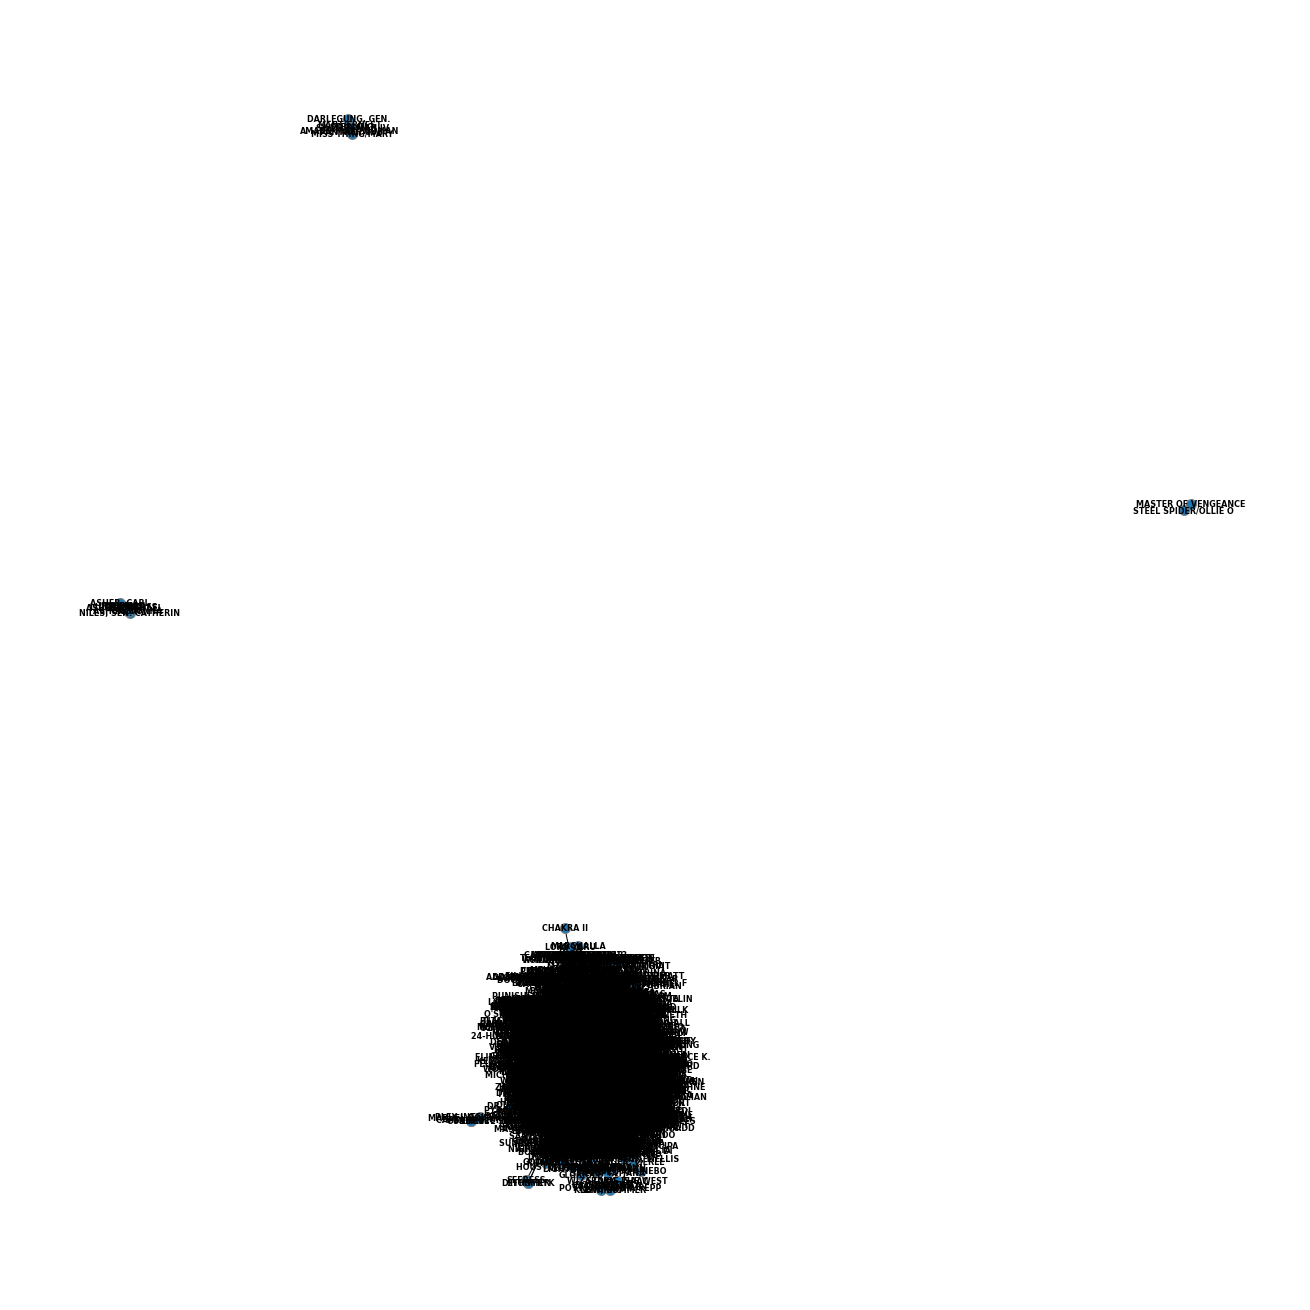

In [13]:
fig = plt.figure(figsize=(18,18))
nx.draw(G1, with_labels=True, node_size=100, font_size=8, font_weight="bold",
         edgecolors='gray')

plt.show()

## 1.3 Second graph

In [67]:
attributes = nodes.set_index('node').to_dict('index')
attributes

{'2001 10': {'type': 'comic'},
 '2001 8': {'type': 'comic'},
 '2001 9': {'type': 'comic'},
 '24-HOUR MAN/EMMANUEL': {'type': 'hero'},
 '3-D MAN/CHARLES CHAN': {'type': 'hero'},
 '4-D MAN/MERCURIO': {'type': 'hero'},
 '8-BALL/': {'type': 'hero'},
 "A '00": {'type': 'comic'},
 "A '01": {'type': 'comic'},
 'A 100': {'type': 'comic'},
 'A 101': {'type': 'comic'},
 'A 102': {'type': 'comic'},
 'A 103': {'type': 'comic'},
 'A 104': {'type': 'comic'},
 'A 105': {'type': 'comic'},
 'A 106': {'type': 'comic'},
 'A 107': {'type': 'comic'},
 'A 108': {'type': 'comic'},
 'A 109': {'type': 'comic'},
 'A 10': {'type': 'comic'},
 'A 110': {'type': 'comic'},
 'A 111': {'type': 'comic'},
 'A 112': {'type': 'comic'},
 'A 113': {'type': 'comic'},
 'A 114': {'type': 'comic'},
 'A 115': {'type': 'comic'},
 'A 116': {'type': 'comic'},
 'A 117': {'type': 'comic'},
 'A 118': {'type': 'comic'},
 'A 119': {'type': 'comic'},
 'A 11': {'type': 'comic'},
 'A 120': {'type': 'comic'},
 'A 121': {'type': 'comic'},
 '

In [68]:
G2 = nx.from_pandas_edgelist(edges, 'hero', 'comic')
nx.set_node_attributes(G2, attributes)

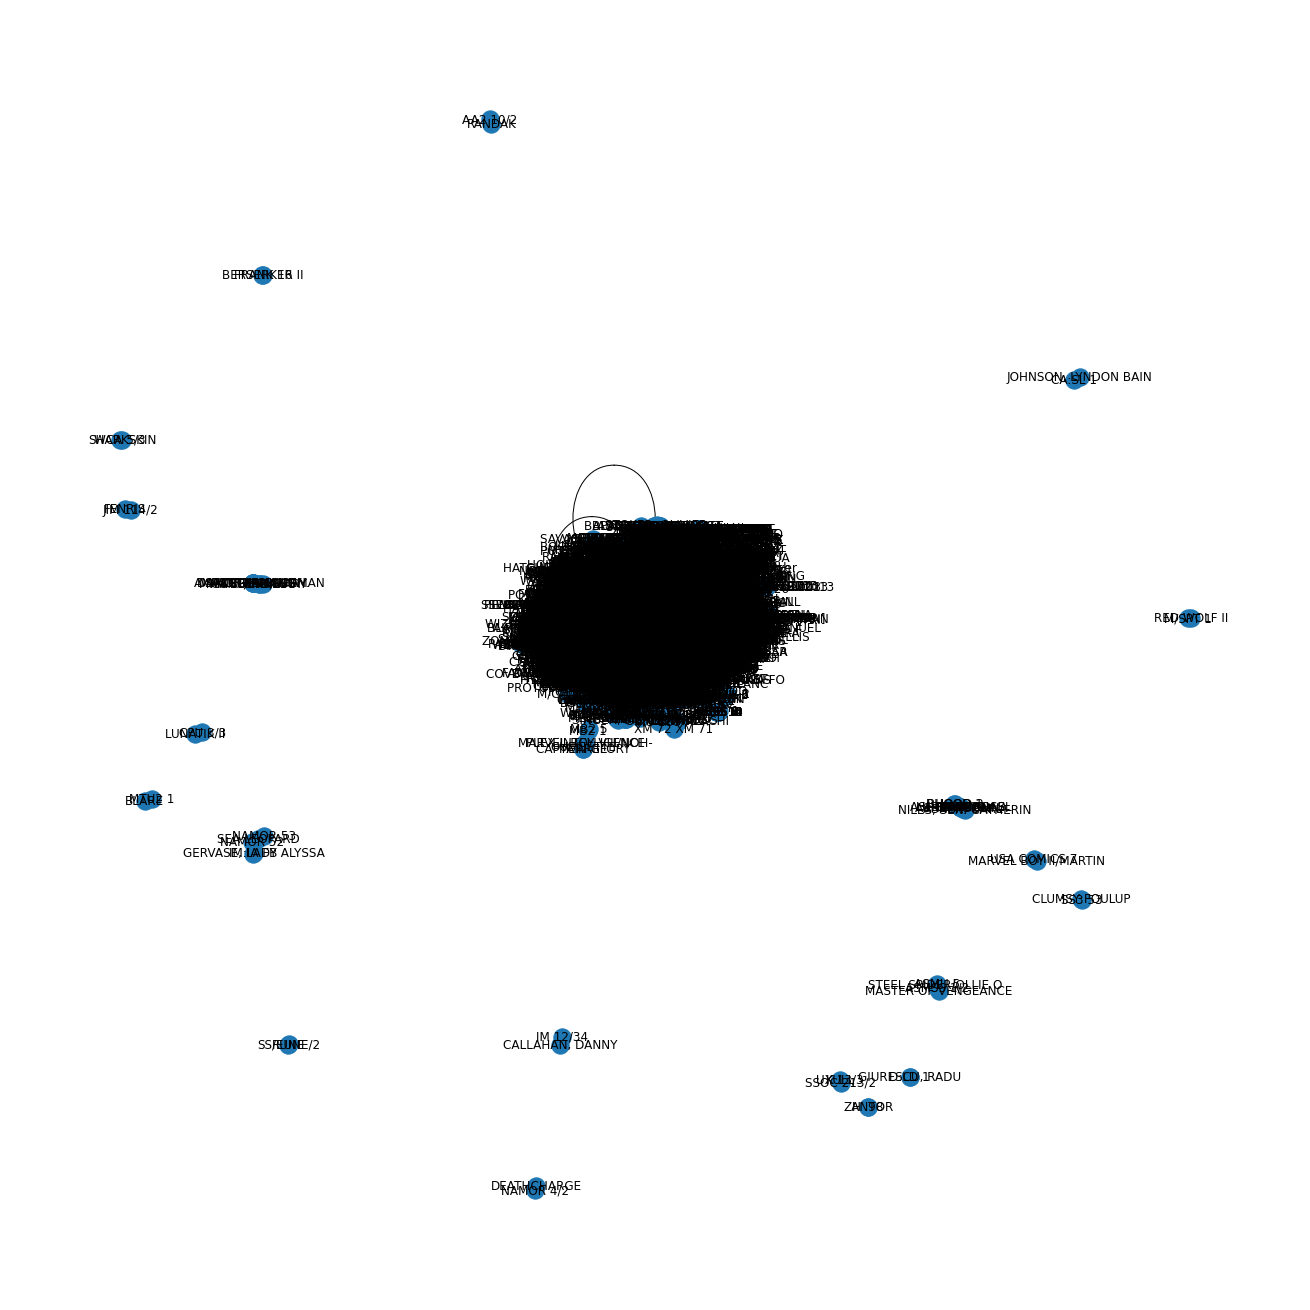

In [58]:
fig = plt.figure(figsize=(18,18))
nx.draw(G2, with_labels=True,node_size=300)
plt.show()

# 2. Backend Implementation

## Functionality 1 - extract the graph's features

In [50]:
n_nodes = int(G1.number_of_nodes())
print("Total number of nodes: ", n_nodes)
n_edges = int(G1.number_of_edges())
print("Total number of edges: ", n_edges)

Total number of nodes:  6420
Total number of edges:  572235


In [51]:
print("Degree for all nodes: ", list(G1.degree())[:20])

Degree for all nodes:  [('LITTLE, ABNER', 44), ('PRINCESS ZANDA', 30), ("BLACK PANTHER/T'CHAL", 3671), ('STEELE, SIMON/WOLFGA', 21), ('FORTUNE, DOMINIC', 37), ('ERWIN, CLYTEMNESTRA', 186), ('IRON MAN/TONY STARK', 11817), ('IRON MAN IV/JAMES R.', 2182), ('RAVEN, SABBATH II/EL', 26), ('CARNIVORE/COUNT ANDR', 121), ('GHOST', 66), ('ZIMMER, ABE', 232), ('FU MANCHU', 217), ('TARR, BLACK JACK', 436), ('SMITH, SIR DENIS NAY', 377), ('SHANG-CHI', 741), ('STARSHINE II/BRANDY', 550), ('ROM, SPACEKNIGHT', 676), ('MAN-THING/THEODORE T', 401), ('WU, LEIKO', 406)]


In [35]:
print("Total number of self-loops: ", int(nx.number_of_selfloops(G1)))
print("List of all nodes with self-loops: ",
             list(nx.nodes_with_selfloops(G1)))

Total number of self-loops:  0
List of all nodes with self-loops:  []


In [36]:
print("List of all nodes we can go to in a single step from some node: ",
                                                 list(G1.neighbors('LITTLE, ABNER')))

List of all nodes we can go to in a single step from some node:  ['PRINCESS ZANDA', "BLACK PANTHER/T'CHAL", 'CARNIVORE/COUNT ANDR', 'IRON MAN/TONY STARK', 'GOLDEN-BLADE', 'DIXON, GENERAL', 'IRON MAN IV/JAMES R.', 'JOCASTA', 'FUJIKAWA, RUMIKO', 'MADAME MENACE/SUNSET', 'JACOBS, GLENDA', 'WAR MACHINE II/PARNE', 'SAPPER', 'HOGAN, VIRGINIA PEPP', 'BINARY/CAROL DANVERS', 'FIN FANG FOOM/MIDGAR', 'MANN, DR. J. VERNON', 'THOR/DR. DONALD BLAK', 'TEMPEST II/NICOLETTE', 'JARVIS, EDWIN', 'INFERNO III/SAMANTHA', 'DECAY II/YOSHIRO HAC']


In [37]:
hero_net['hero1'].value_counts()

CAPTAIN AMERICA         8149
FAMINE/AUTUMN ROLFSO    6828
IRON MAN/TONY STARK     5850
THOR/DR. DONALD BLAK    5712
THING/BENJAMIN J. GR    5369
                        ... 
RAZORFIST IV/MARCO S       1
MARISTA                    1
THANADEMOS                 1
JONES, PHILLIP             1
SEAWEED MAN                1
Name: hero1, Length: 6205, dtype: int64

In [38]:
hero_net['hero2'].value_counts()

CAPTAIN AMERICA         8350
FAMINE/AUTUMN ROLFSO    7193
IRON MAN/TONY STARK     5967
THOR/DR. DONALD BLAK    5715
THING/BENJAMIN J. GR    5312
                        ... 
SHADOWCASTER               1
MAGOG                      1
SANDERS, MAC               1
KREIGKOPH, GEN.            1
MARKS, DR. SHIELA          1
Name: hero2, Length: 6168, dtype: int64

## Functionality 4 - Disconnecting Graphs (da rivedere/continuare)

Input:

- The graph data
- heroA: a superhero to which will relate sub-graph G_a
- heroB: a superhero to which will relate sub-graph G_b
- N: denoting the top N heroes that their data should be considered


Output:

- The minimum number of links (by considering their weights) required to disconnect the original graph in two disconnected subgraphs: G_a and G_b.

In [69]:
print(nx.is_connected(G1))
print(nx.is_connected(G2))

False
False


In [14]:
# nx.connected_components gets the list of components,
# max() command returns the largest one
components = nx.connected_components(G1)
largest_component = max(components, key=len)

In [16]:
# returns neighbors
sorted(list(G1.neighbors('JOCASTA')))[:10]

['3-D MAN/CHARLES CHAN',
 'AJAK/TECUMOTZIN [ETE',
 'ANGEL/WARREN KENNETH',
 'ANT-MAN II/SCOTT HAR',
 'ANT-MAN/DR. HENRY J.',
 'ANTOINETTE, MARIE',
 'ARABIAN KNIGHT/ABDUL',
 'ARBOGAST, BAMBI',
 'ASTROVIK, NORMA',
 'ATTUMA']

In [105]:
# returns all nodes reachable from source in G
sorted(list(nx.descendants(G1, 'JOCASTA')))[:10]

['24-HOUR MAN/EMMANUEL',
 '3-D MAN/CHARLES CHAN',
 '4-D MAN/MERCURIO',
 '8-BALL',
 'A',
 "A'YIN",
 'ABBOTT, JACK',
 'ABCISSA',
 'ABEL',
 'ABOMINATION | MUTANT']

In [67]:
# add N
def disconneting_graphs(G, heroA, heroB):
    G_a = []
    G_b = []

    neighbors_a = sorted(list(G1.neighbors(heroA)))
    neighbors_b = sorted(list(G1.neighbors(heroB)))

    for neigA in neighbors_a:
        G_a.append((heroA, neigA))
    
    for neigB in neighbors_b:
        G_b.append((heroB, neigB))

    return G_a, G_b, len(G_a) + len(G_b)

In [68]:
G_a, G_b, result = disconneting_graphs(G1, 'JOCASTA', '8-BALL')
print(result)

231


In [71]:
newG1 = G1.copy()
newG1.remove_edges_from(G_a)
newG1.remove_edges_from(G_b)

In [73]:
new_n_edges = int(newG1.number_of_edges())
G1.number_of_edges() - new_n_edges

231